In [1]:
""" 12H17 """

' 12H17 '

# Homework 1 

Due date : **2023-02-24 @23h55** (this is a **hard deadline**)

## Fill this cell with your names

- Mrassi, Yacine, Informatique
- Jami, Adam, Mathématique-Informatique

## Carefully follow instructions

**If you don't: no evaluation!**

Write in English or French

The deliverable is a file

- `xxx_yyy.ipynb` file (jupyter notebook) or 
- `xxx_yyy.py` file (if you are using `jupytext`) or
- `xxx_yyy.qmd` file (if you are using `quarto`)

where `xxx` and `yyy` are your names, for example `lagarde_michard.ipynb`. 

The deliverable is not meant to contain cell outputs.  

The data files used to execute cells are meant to sit in the same directory as the deliverable. Use relative filepaths or urls to denote the data files.   

We **will** execute the code in your notebook: make sure that running all the cells works well. 



## Grading <i class="fa graduation-cap"></i>

Here is the way we'll assess your work

| Criterion | Points | Details |
|:----------|:-------:|:----|
|Spelling and syntax | 3 | English/French  |
|Plots correction | 3 |  Clarity / answers the question  |
|Plot style and cleanliness | 3 | Titles, legends, labels, breaks ... |
|Table wrangling | 4 | ETL, SQL like manipulations |
|Computing Statistics | 5 | SQL `goup by`  and aggregation  |
|DRY compliance | 2 | DRY principle at [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)|

If we see a single (or more) `for` loop in your code: **-5 points**.  Everything can be done using high-level `pandas` methods

# Preliminaries

## Notebooks: Modus operandi

- This is a [Jupyter Notebook](https://jupyter.org).
- When you execute code within the notebook, the results appear beneath the code.
- [Jupytext](https://github.com/mwouts/jupytext)
- [Quarto](https://quarto.org) 

## Packages

- Base `Python` can do a lot. But the full power of `Python` comes from a fast growing collection of `packages`/`modules`.

- Packages are first installed (that is using `pip install` or `conda install`), and if
needed, imported during a session.

- The `docker` image you are supposed to use already offers a lot of packages. You should not need to install new packages.

- Once a package has been installed on your drive, if you want all objects exported by the package to be available in your session, you should import the package, using `from pkg import *`.

- If you just want to pick some subjects from the package,
you can use qualified names like `pkg.object_name` to access the object (function, dataset, class...)


In [2]:
# importing basic tools
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

import os            # file operations
import requests      # networking
import zipfile
import io
from pathlib import Path

from datetime import date  # if needed



In [3]:
# importing plotting packages
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt


In [4]:
# make pandas plotly-friendly
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"

# Getting the data

## French data

The French data are built and made available by [INSEE](https://www.insee.fr/fr/accueil)  (French Governement Statistics Institute)

Prénoms:
- [https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip](https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip)

This dataset has been growing for a while. It has been considered by
social scientists for decades.  Given names are meant to give insights into a variety
of phenomena, including religious observance.

- A glimpse at the body of work can be found in [_L'archipel français_ by Jérome Fourquet, Le Seuil, 2019 ](https://www.seuil.com/ouvrage/l-archipel-francais-jerome-fourquet/9782021406023)

- Read the [File documentation](https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#documentation)

## US data 

US data may be gathered from 

[Baby Names USA from 1910 to 2021 (SSA)](https://www.kaggle.com/datasets/donkea/ssa-names-1910-2021?resource=download)

See [https://www.ssa.gov/oact/babynames/background.html](https://www.ssa.gov/oact/babynames/background.html)


## British data 

English and Welsh data can be gathered from 

[https://www.ons.gov.uk/](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesinenglandandwalesfrom1996?utm_source=pocket_saves)




## Download the French data

**QUESTION:** Download the data into a file which relative path is `'./nat2021_csv.zip'`

__Hints:__

- Have a look at  package [`requests`](https://requests.readthedocs.io/en/master/).
- Use magic commands to navigate across the file hierarchy and create subdirectories when needed

In [13]:
# for French data 

params = dict(
    url = 'https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip',
    dirpath = './',
    timecourse = '',
    datafile = 'nat2021.hdf',
    fpath = 'nat2021_csv.zip'
)

In [14]:
# modify location  make sure you are in the right directory
# %cd
# %pwd  #
# %ls
# %mkdir # if needed

In [15]:
url = params['url']      # 'https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip'
fpath = params['fpath']  # './nat2021_csv.zip'

In [16]:
if not Path(params['fpath']).exists():
    r = requests.get(params['url'])
    # What is the type of `r` ? 
    """ It's a 'requests.Response' object, 
    which represents the HTTP response received from the server in response to a GET request.
    """
    z = zipfile.ZipFile((io.BytesIO(r.content)))   
    # What is the type of `z` ?
    """ It's a 'zipfile.ZipFile' object,
    which represents a zip archive file.
    
    """
    z.extractall(path='./')



## Download US and British data 



In [11]:
#For US data

params = dict(
    url = 'https://www.ssa.gov/oact/babynames/names.zip',
    dirpath = './',
    timecourse = '',
    datafile = 'babies-us.hdf',
    fpath = 'babies-us.zip'
)

url = params['url']   
fpath= params['fpath']

if not Path(params['fpath']).exists():
    r = requests.get(params['url'])
    # What is the type of `r` ? 
    """ It's a 'requests.Response' object, 
    which represents the HTTP response received from the server in response to a GET request.
    """
    z = zipfile.ZipFile((io.BytesIO(r.content)))   
    # What is the type of `z` ?
    """ It's a 'zipfile.ZipFile' object,
    which represents a zip archive file.
    
    """
    z.extractall(path='./')


In [12]:

all_data = pd.DataFrame(columns=["firstname", "gender", "year", "count"])

year_range = range(1880, 2021)
year_data_list = (pd.read_csv(f"yob{year}.txt", header=None, names=["firstname", "gender", "count"]) for year in year_range)


all_data = pd.concat([year_data.assign(year=year) for year, year_data in zip(year_range, year_data_list)], ignore_index=True)


all_data.to_csv("babies-us.csv",index=False)

files_to_delete = (f for f in os.listdir("./") if f.endswith(".txt"))
_ = list(map(lambda f: os.remove(os.path.join("./", f)), files_to_delete))
os.remove("NationalReadMe.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'NationalReadMe.pdf'

## Load the French data in memory

**QUESTION:** Load the data in a `pandas` `DataFrame` called `data`

__Hints:__

- You should obtain a `Pandas dataframe` with 4 columns.
- Mind the conventions used to build the `csv` file.
- Package `pandas` provides the convenient tools.
- The dataset, though not too large, is already demanding.
- Don't hesitate to test your methods on a sample of rows method `sample()` from class `DataFrame` can be helpful.

In [17]:

filename="nat2021.csv"
data = pd.read_csv(filename, sep=";")
data.sample()

,sexe,preusuel,annais,nombre
54701,1,CHOUAIB,1971,4


## Load US and British data in memory

In [18]:
filename="babies-us.csv"
USdata = pd.read_csv(filename, sep=",")


## Explore the data

**QUESTION:** Look at the data, Use the attributes `columns`, `dtypes` and the methods `head`, `describe`, to get a feeling of the data.

- This dataset is supposed to report all given names used
for either sex during a year in France since 1900

- The file is made of `652 056` lines and  4 columns.

```
|-- preusuel : object
|-- nombre: int64
|-- sexe: int64
|-- annais: object
```

Each row indicates for a given `preusuel` (prénom usuel, given name), `sexe` (sex), and `annais` (année naissance, birthyear) the `nombre` (number) of babies of the given sex who were given that name during the given year.

|sexe    |preusuel     | annais|   nombre|
|:------|:--------|----:|---:|
|2     |SYLVETTE | 1953| 577|
|1   |BOUBOU   | 1979|   4|
|1   |NILS     | 1959|   3|
|2   |NICOLE   | 2003|  36|
|1   |JOSÉLITO | 2013|   4|


**QUESTION:** Compare memory usage and disk space used by data

**Hints:**

- The method `info`  prints a concise summary of a `DataFrame`.
- With optional parameter `memory_usage`, you can get an estimate
of the amount of memory used by the `DataFrame`.
- Beware that the resulting estimate depends on the argument fed.

In [19]:
data.columns

Index(['sexe', 'preusuel', 'annais', 'nombre'], dtype='object')

In [20]:
data.dtypes

sexe         int64
preusuel    object
annais      object
nombre       int64
dtype: object

In [21]:
data

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [22]:
data.describe()


,sexe,nombre
count,686538.000000,686538.000000
mean,1.543406,127.340179
std,0.498113,874.907958
min,1.000000,1.000000
25%,1.000000,4.000000
50%,2.000000,8.000000
75%,2.000000,25.000000
max,2.000000,53547.000000


In [23]:
data.info() 
#The memory used by the DataFrame is 21.0+ MB
%ls -l --block-size=MB
#The disk space used by data (the size of the .csv file) is 13 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686538 entries, 0 to 686537
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sexe      686538 non-null  int64 
 1   preusuel  686536 non-null  object
 2   annais    686538 non-null  object
 3   nombre    686538 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.0+ MB
total 49MB
-rw-r--r-- 1 root root 35MB Nov  8 12:10  babies-us.csv
-rw-rw-r-- 1 1000 1000  1MB Jan 26  2023  docker-compose.yml
-rw-rw-r-- 1 1000 1000  1MB Jul 28 12:15  homework03.ipynb
-rw-r--r-- 1 root root  1MB Oct 11 12:01  mrassi_gueye.ipynb
-rw-rw-r-- 1 1000 1000  2MB May 24 21:40  mrassi_jami.ipynb
-rw-r--r-- 1 root root 13MB Nov  8 12:10  nat2021.csv
-rw-rw-r-- 1 1000 1000  1MB Oct 23 20:55  network_wite_skew2.ipynb
-rw-rw-r-- 1 1000 1000  1MB Nov  6 22:45  notebook02_numpy.ipynb
-rw-rw-r-- 1 1000 1000  1MB Nov  6 22:45  notebook03_pandas.ipynb
-rw-rw-r-- 1 1000 1000  1MB Nov  6 22:45  not

**QUESTION:** Display the output of `.describe()` with style.

In [24]:
(
    data.groupby(['sexe'])
    .describe()
    .style
    .bar(subset=[("nombre", "count")])
    .highlight_max(color='purple')
)

**QUESTION:** For each column compute the number of distinct values

In [25]:
data.nunique()

sexe            2
preusuel    36170
annais        123
nombre       7281
dtype: int64

# Transformations

## Improving the data types

**QUESTION:** Make `sexe` a category with two levels `Female` and `Male`. Call the new column `gender`. Do you see any reason why this factor should be ordered?

__Hint:__ Read [Pandas and categorical variables](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=category)

In [26]:
data['gender'] = data['sexe'].astype("category")
data.dtypes


sexe           int64
preusuel      object
annais        object
nombre         int64
gender      category
dtype: object

In [27]:
data['gender'] = data['gender'].cat.rename_categories(['Male', 'Female'])
data

,sexe,preusuel,annais,nombre,gender
0,1,_PRENOMS_RARES,1900,1249,Male
1,1,_PRENOMS_RARES,1901,1342,Male
2,1,_PRENOMS_RARES,1902,1330,Male
3,1,_PRENOMS_RARES,1903,1286,Male
4,1,_PRENOMS_RARES,1904,1430,Male
...,...,...,...,...,...
686533,2,ZYNEB,2018,5,Female
686534,2,ZYNEB,2019,7,Female
686535,2,ZYNEB,2020,8,Female
686536,2,ZYNEB,2021,6,Female



>By representing "sexe" as a categorical variable, we optimize memory usage compared to using numerical data.Thanks to it, We could group the data by "sexe" and calculate summary statistics separately for males and females

**QUESTION:** Compare memory usage of columns `sexe` and `gender`

In [28]:

print(data['gender'].memory_usage())
print(data['sexe'].memory_usage())



686790
5492432


**QUESTION:** Would it be more memory-efficient to recode `sexe` using modalities `F` and `M` instead of `Male` and `Female` ?

_Insert your answer here_

> No, it's just a value coresponding to the position of the category.

## Dealing with missing values

**QUESTION:** Variable `annais` class is `object`. Make `annais` of type `float`. Note that missing years are encoded as "XXXX", find a way to deal with that.

__Hint:__  As of releasing this Homework (2023-01-18), `Pandas` is not very good at managing missing values,
see [roadmap](https://pandas.pydata.org/docs/development/roadmap.html). Don't try to convert `annais` into an integer column.

In [29]:
data['annais'] = pd.to_numeric(data['annais'], downcast='float', errors='coerce')

data['annais'] 



0         1900.0
1         1901.0
2         1902.0
3         1903.0
4         1904.0
           ...  
686533    2018.0
686534    2019.0
686535    2020.0
686536    2021.0
686537       NaN
Name: annais, Length: 686538, dtype: float32

## Rename and remove columns

**QUESTION:** Remove useless columns (now that you've created new ones, and rename them). You should end up with a dataframe with columns called `"gender"`, `"year"`, `"count"`, `"firstname`" with the following dtypes:

```python
gender        category
firstname     object
count         int64
year          float64
```

In [30]:
data = data.drop(columns=["sexe"]).rename(columns={"preusuel":"firstname", "annais":"year", "nombre":"count"})
data


,firstname,year,count,gender
0,_PRENOMS_RARES,1900.0,1249,Male
1,_PRENOMS_RARES,1901.0,1342,Male
2,_PRENOMS_RARES,1902.0,1330,Male
3,_PRENOMS_RARES,1903.0,1286,Male
4,_PRENOMS_RARES,1904.0,1430,Male
...,...,...,...,...
686533,ZYNEB,2018.0,5,Female
686534,ZYNEB,2019.0,7,Female
686535,ZYNEB,2020.0,8,Female
686536,ZYNEB,2021.0,6,Female


In [31]:
data.columns
data.dtypes

firstname      object
year          float32
count           int64
gender       category
dtype: object

**Question:** Do the same thing for British and US data. You should eventually obtain dataframes with the same schema.  

In [32]:
USdata.columns
USdata['year'] = pd.to_numeric(USdata['year'], downcast='float', errors='coerce')
USdata['gender']=USdata['gender'].astype("category")
USdata.dtypes
USdata['gender'] = USdata['gender'].cat.rename_categories({"M":"Male", "F":"Female"})
USdata

,firstname,gender,count,year
0,Mary,Female,7065,1880.0
1,Anna,Female,2604,1880.0
2,Emma,Female,2003,1880.0
3,Elizabeth,Female,1939,1880.0
4,Minnie,Female,1746,1880.0
...,...,...,...,...
2021553,Zykier,Male,5,2020.0
2021554,Zylus,Male,5,2020.0
2021555,Zymari,Male,5,2020.0
2021556,Zyn,Male,5,2020.0


**QUESTION:** How many missing values (NA) have been introduced? How many births are concerned?

In [33]:
missing_values_count = data.isna().sum()
print("Number of missing values for France data in each column:")
print(missing_values_count)


births_with_missing_values_count = data[np.isnan(data['year']) | data['firstname'].isna()]['count'].sum()

print(str(births_with_missing_values_count)+ " births are concerned in France data")



Number of missing values for France data in each column:
firstname        2
year         37924
count            0
gender           0
dtype: int64
874892 births are concerned in France data


**QUESTION:** Read the documentation and describe the origin of rows containing the missing values.

> Conditions portant sur les prénoms retenus 
> 1. Sur la période allant de 1900 à 1945, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin
> 2. Sur la période allant de 1946 à 2021, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin 
> 3. Pour une année de naissance donnée, le prénom a été attribué au moins 3 fois à des personnes de sexe féminin ou de sexe masculin

>Les effectifs des prénoms ne remplissant pas les conditions 1 et 2 sont regroupés (pour chaque sexe et chaque année de naissance) dans un enregistrement dont le champ prénom (PREUSUEL) prend la valeur «_PRENOMS_RARES_». Les effectifs des prénoms remplissant la condition 2 mais pas la condition 3 sont regroupés (pour chaque sexe et chaque prénom) dans un enregistrement dont le champ année de naissance (ANNAIS) prend la valeur «XXXX»


> The rows with missing values correspond to names that were used at least 20 times between 1946 and 2020, but were not used at least 3 times in each year.

## Checkpointing: save your transformed dataframes

**QUESTION:** Save the transformed dataframe (retyped and renamed) to `./nat2021_csv.zip`. Try several compression methods.

In [34]:
data.to_csv(path_or_buf='./babies-fr.zip',index=False, compression='zip')
USdata.to_csv(path_or_buf='./babies-us.zip',index=False, compression='zip')

/usr/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: './babies-fr.zip'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: './babies-us.zip'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


**QUESTION:** Save the transformed dataframes (retyped and renamed) to `./nat2021.hdf` using `.hdf` format

In [35]:
data.to_hdf('./babies-fr.hdf',key='data', mode='w',format='table',index=False)
USdata.to_hdf('./babies-us.hdf',key='USdata', mode='w',format='table',index=False)


At that point your working directory should look like:

```
├── homework01.py      # if you use `jupytext`
|── homework01.qmd     # if you use `quarto`
├── homework01.ipynb   # if you use `jupyter` `notebook`
├── babies-fr.hdf
├── babies-fr.zip
├── babies-us.hdf
├── babies-us.zip
├── babies-ew.hdf
├── babies-ew.zip
├── births-fr.csv
├── births-fr.hdf
```

**QUESTION:** Reload the data using `read_hdf(...)` so that the resulting dataframes  are properly typed with meaningful and homogeneous column names.

__Hint:__ use `try: ... except` to handle exceptions such as `FileNotFoundError`

In [36]:
try : 
    data_fr = pd.read_hdf("./babies-fr.hdf")
    
except FileNotFoundError : 
    print("babies-fr.hdf Not Found")
    

try : 
    data_us = pd.read_hdf("./babies-us.hdf")
    
except FileNotFoundError : 
    print("babies-us.hdf Not Found")


## Some data "analytics" and visualization

**QUESTION**: For each year, compute the total number of Female and Male births and the proportion of Female  births among total births

__Hints:__

- Groupby operations using several columns for the groups return a dataframe with a `MultiIndex` index see [Pandas advanced](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

- Have a look at `MultiIndex`, `reset_index`, `pivot`, `columns.droplevel`

In [37]:
data_dict = {0: data, 1: USdata}
#let's assume that: 0 for french data, 1 for US data, 2 for british data

def name(x):
    if x==0 : return 'french data'
    elif x==1 : return 'us data'
    else: return 'uk data'


In [38]:
total_births_by_year = [data_dict[x]
                        .groupby('year')['count']
                        .sum() 
                        for x in data_dict.keys()
                       ]

total_female_births_by_year=[
    data_dict[x][data_dict[x]['gender']=='Female']
    .groupby(['year'])['count']
    .sum()
    for x in data_dict.keys()
]
total_male_births_by_year=[
    data_dict[x][data_dict[x]['gender']=='Male']
    .groupby(['year'])['count']
    .sum() 
    for x in data_dict.keys()
]
proportion_female_births_by_year = [
                                    ((
                                    total_female_births_by_year[x] / 
                                    total_births_by_year[x]
                                    )
                                    .reset_index()
                                    .rename(columns={"count":"f_proportion"}))
                                    for x in data_dict.keys()]


In [39]:
display(proportion_female_births_by_year[0])


,year,f_proportion
0,1900.0,0.572603
1,1901.0,0.567843
2,1902.0,0.561275
3,1903.0,0.557689
4,1904.0,0.552908
...,...,...
117,2017.0,0.487429
118,2018.0,0.486993
119,2019.0,0.488160
120,2020.0,0.488005


In [40]:
display(proportion_female_births_by_year[1])

,year,f_proportion
0,1880.0,0.451619
1,1881.0,0.477207
2,1882.0,0.486821
3,1883.0,0.517735
4,1884.0,0.529937
...,...,...
136,2016.0,0.482857
137,2017.0,0.482614
138,2018.0,0.483626
139,2019.0,0.483331


**QUESTION:** Plot the proportion of female births as a function of year and French, US, en British babynames data. Compare with what you get from `births-fr.hdf`.

Don't forget: title, axes labels, ticks, scales, etc.

Because of what we did before, the `plot` method of a `DataFrame` with be rendered using `plotly`, so you can use this. But you can use also `seaborn` or any other available plotting library that you want.

__Hint:__ Mind the missing values in the `year` column

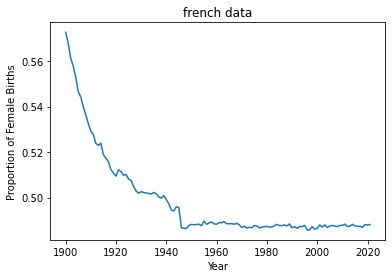

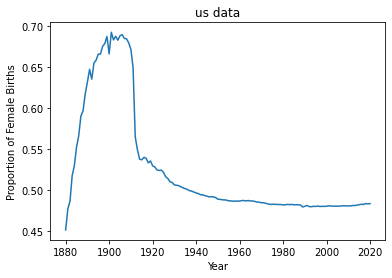

In [41]:
for x in range(len(proportion_female_births_by_year)):
    plt.figure(x)
    plt.plot(proportion_female_births_by_year[x]['year'], proportion_female_births_by_year[x]['f_proportion'])
    plt.title(f"{name(x)}")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Female Births")

plt.show()

**QUESTION:** Make any sensible comment about these plots.

_Insert your answer here_

> For french data

> The plot displays a progressively decrease in the proportion of female births from the early 1900s to around 1945, followed by a relatively stable period until nowadays.

> It does not vary greatly, it's always around 0.5


**QUESTION:** Explore the fluctuations of sex ratio around its mean value since 1945  in the US, in France and in the Great Britain.

Plot deviations of sex ratio around its mean since 1945 as a function of time.

In [42]:
sex_ratio_by_year =[(( 
                     total_male_births_by_year[x]/ 
                    total_female_births_by_year[x]
                   )[1946:])for x in data_dict.keys()]

mean_sex_ratio = [sex_ratio_by_year[x].mean() for x in data_dict.keys()]

mean_sex_ratio

[1.0505318365754308, 1.0675328936895372]

In [43]:
def sex_ratio_plots(df,mean_df):
    for x in range(len(df)):
        plt.figure(x)
        plt.plot(df[x].index, df[x].values)
        plt.title(f"Fluctuations in sex ratio since 1945 of {name(x)}")
        plt.xlabel("Year")
        plt.ylabel("sex ratio")
        plt.axhline(y=float(mean_sex_ratio[x]), color='r', linestyle='--', label='Mean sex ratio')
        plt.legend()
    plt.show()

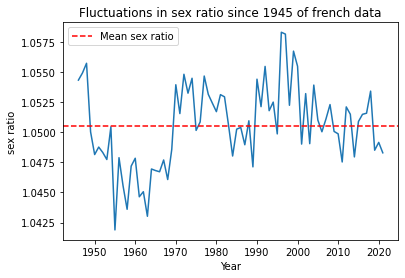

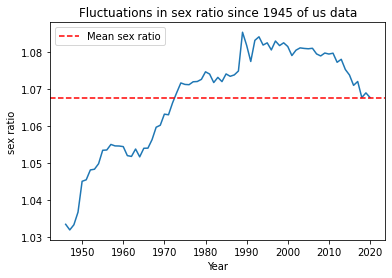

In [44]:
sex_ratio_plots(sex_ratio_by_year,mean_sex_ratio)

**QUESTION:**  Assume that baby gender is chosen at random according to a Bernoulli distribution with success probability $.48$, that baby genders are i.i.d. Perform simulations for sex ratios for French and US data since 1945. 

Plot the results, compare with your plots above.  

In [45]:
def get_bernoulli_data(data):    
    bernoulli = np.random.binomial(1, 0.48, size=len(data))
    not_simulated = data[bernoulli == 0]
    not_simulated = not_simulated.loc[:,'gender'].apply(lambda x: 'Female' if x == 'Male' else 'Male')
    simulated = data[bernoulli == 1]
    bernoulli_data = pd.concat([simulated, not_simulated], ignore_index=True)
    return bernoulli_data


In [46]:
df=[get_bernoulli_data(data_dict[x]) for x in data_dict.keys()]

total_female_births_by_year_bernoulli=[
    df[x][df[x]['gender']=='Female']
    .groupby(['year'])
    .sum()
    for x in [0,1]
]
total_male_births_by_year_bernoulli=[
    df[x][df[x]['gender']=='Male']
    .groupby(['year'])
    .sum() 
    for x in [0,1]
]

sex_ratio_by_year_bernoulli =[(( 
                     total_male_births_by_year_bernoulli[x]/ 
                    total_female_births_by_year_bernoulli[x]
                   )[1946:])for x in [0,1]]

mean_sex_ratio_bernoulli = [sex_ratio_by_year_bernoulli[x].mean() for x in [0,1]]
mean_sex_ratio_bernoulli

[count    1.07667
 dtype: float64,
 count    1.089664
 dtype: float64]

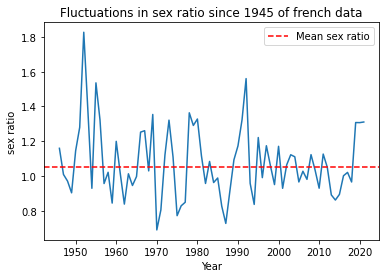

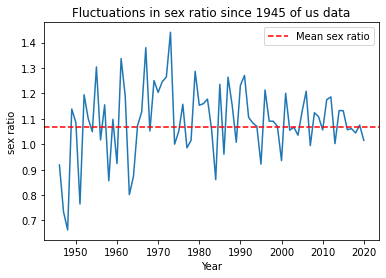

In [47]:
sex_ratio_plots(sex_ratio_by_year_bernoulli,mean_sex_ratio_bernoulli)

# The rise, decline and fall of firstnames

**Question:** For each year, country, gender and firstname, compute the popularity rank of the firstname among the names given to babies with that gender, in that country, in that year. The most popular name should be given rank $1$.  

In [48]:
dataFrance_without_null = data.dropna()
dataFrance_sorted = dataFrance_without_null.loc[dataFrance_without_null['firstname'] != '_PRENOMS_RARES'] \
    .sort_values(by=['year', 'gender', 'count'], ascending=[True, True, False]) \
    .groupby(['year', 'gender']) \
    .apply(lambda x: x.assign(rank=x['count'].rank(method='dense', ascending=False))) \
    .reset_index(drop=True)
dataFrance_sorted

,firstname,year,count,gender,rank
0,JEAN,1900.0,14097,Male,1.0
1,LOUIS,1900.0,9052,Male,2.0
2,PIERRE,1900.0,7456,Male,3.0
3,JOSEPH,1900.0,7259,Male,4.0
4,HENRI,1900.0,6921,Male,5.0
...,...,...,...,...,...
648364,ZOËLIE,2021.0,3,Female,438.0
648365,ZOÉLINE,2021.0,3,Female,438.0
648366,ZOHA,2021.0,3,Female,438.0
648367,ZOÏA,2021.0,3,Female,438.0


In [49]:
dataUS_without_null = USdata.dropna()
dataUS_sorted = dataUS_without_null.loc[dataUS_without_null['firstname'] != '_PRENOMS_RARES'] \
    .sort_values(by=['year', 'gender', 'count'], ascending=[True, True, False]) \
    .groupby(['year', 'gender']) \
    .apply(lambda x: x.assign(rank=x['count'].rank(method='dense', ascending=False))) \
    .reset_index(drop=True)
dataUS_sorted

,firstname,gender,count,year,rank
0,Mary,Female,7065,1880.0,1.0
1,Anna,Female,2604,1880.0,2.0
2,Emma,Female,2003,1880.0,3.0
3,Elizabeth,Female,1939,1880.0,4.0
4,Minnie,Female,1746,1880.0,5.0
...,...,...,...,...,...
2021553,Zykier,Male,5,2020.0,915.0
2021554,Zylus,Male,5,2020.0,915.0
2021555,Zymari,Male,5,2020.0,915.0
2021556,Zyn,Male,5,2020.0,915.0



**QUESTION:** For each firstname and sex (some names may be given to girls and boys), compute the total number of times this firstname has been given during `1900-2019`. Print the top 20 firstnames given and style your result dataframe using `background_gradient` for instance.

In [50]:
 top_births_by_firstname_gender=[( data_dict[x][data_dict[x]['year'] <= 2019]
                             .groupby(['gender', 'firstname'])
                             .sum()
                             .sort_values(['count'], ascending = False)
                             .drop(columns=['year'])
                              .head(20)
                              .style.background_gradient(axis=0)
                            ) for x in data_dict.keys()]

In [51]:
top_births_by_firstname_gender[0]

In [52]:
top_births_by_firstname_gender[1]

## Rare firstnames

**QUESTION:** In the French data, for each sex, plot the proportion of births given `_PRENOMS_RARES` as a function of the year.

In [53]:
proportion_PRENOMS_RARES_births_by_year = (((data_dict[0][data_dict[0]['firstname']=='_PRENOMS_RARES']
                                             .groupby(['year','gender'])['count']
                                             .sum()) 
                                            / total_births_by_year[0])
                                           .reset_index()
                                           .rename(columns={"count":"proportion"})
                                          )
    
proportion_female_PRENOMS_RARES_births_by_year= proportion_PRENOMS_RARES_births_by_year[proportion_PRENOMS_RARES_births_by_year['gender']=='Female']
proportion_male_PRENOMS_RARES_births_by_year=proportion_PRENOMS_RARES_births_by_year[proportion_PRENOMS_RARES_births_by_year['gender']=='Male']


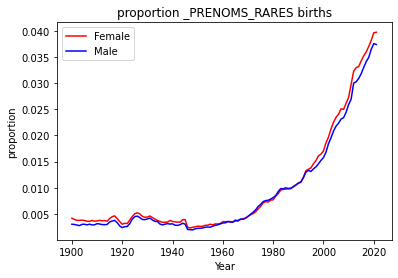

In [54]:
plt.plot(proportion_female_PRENOMS_RARES_births_by_year['year'], proportion_female_PRENOMS_RARES_births_by_year['proportion'],color='red',label='Female')
plt.plot(proportion_male_PRENOMS_RARES_births_by_year['year'], proportion_male_PRENOMS_RARES_births_by_year['proportion'],color='blue',label='Male')

plt.title('proportion _PRENOMS_RARES births')
plt.xlabel('Year')
plt.ylabel('proportion')
plt.legend()
plt.show()

# A study of the "Marie" firstname

**QUESTION:** Plot the proportion of female births given name `'MARIE'` or `'MARIE-...'` (compounded names) as a function of the year.
Proceed in such a way that the reader can see the share of compounded names. We are expecting an _area plot_.

__Hints:__

- Have a look at the `.str` accessor (to apply a string method over a whole column containing string)
- Have a look at [r-graph-gallery: stacked area](https://www.r-graph-gallery.com/stacked-area-graph.html)  and
at [ggplot documentation](https://ggplot2.tidyverse.org/reference/geom_ribbon.html). Pay attention on the way you stack the area corresponding to names matching pattern 'MARIE-.*' over or under the are corresponding to babies named 'MARIE'
- See Graphique 3, page 48, de _L'archipel français_  de J. Fourquet. Le Seuil. Essais. Vol. 898.

- Add annotation, 1st World War, Front Populaire, 2nd World War, 1968

In [55]:
total_female_births_by_year[0]

year
1900.0    237653
1901.0    257492
1902.0    261437
1903.0    261450
1904.0    264822
           ...  
2017.0    368133
2018.0    362716
2019.0    361131
2020.0    352148
2021.0    355705
Name: count, Length: 122, dtype: int64

In [56]:
marie_data_by_year = ((
    data[(data['gender'] == 'Female') 
    &(data['firstname'].notnull()) 
    & ((data['firstname'] == "MARIE")|data['firstname'].str.contains("^MARIE-", regex=True))
    ])
    .drop(columns=['gender'])
    .groupby(['year'])['count']
    .sum()
)

marie_compounded_data_by_year = ((
    data[(data['gender'] == 'Female') 
    &(data['firstname'].notnull()) 
    & data['firstname'].str.contains("^MARIE-", regex=True)
    ]).drop(columns=['gender'])
    .groupby(['year'])['count']
    .sum()
)


proportion_marie_data_of_female_births_by_year = marie_data_by_year / total_female_births_by_year[0]
proportion_marie_compounded_data_of_female_births_by_year = marie_compounded_data_by_year / total_female_births_by_year[0]



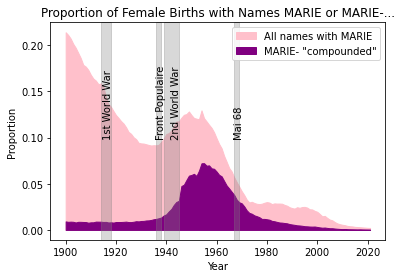

In [57]:
fig, ax = plt.subplots()

ax.fill_between(proportion_marie_data_of_female_births_by_year.index,
                proportion_marie_data_of_female_births_by_year.values,
                color='pink', label='All names with MARIE')

ax.fill_between(proportion_marie_compounded_data_of_female_births_by_year.index,
                proportion_marie_compounded_data_of_female_births_by_year.values,
                color='purple', label='MARIE- "compounded"')

ax.set_title('Proportion of Female Births with Names MARIE or MARIE-...')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')

ax.axvspan(1914, 1918, alpha=0.3, color='gray')
ax.annotate('1st World War', xy=(1915, 0.10), rotation=90)
ax.axvspan(1936, 1938, alpha=0.3, color='gray')
ax.annotate('Front Populaire', xy=(1936, 0.10), rotation=90)
ax.axvspan(1939, 1945, alpha=0.3, color='gray')
ax.annotate('2nd World War', xy=(1942, 0.10), rotation=90)
ax.axvspan(1967, 1969, alpha=0.3, color='gray')
ax.annotate('Mai 68', xy=(1967, 0.10), rotation=90)


ax.legend()
plt.show()

# Top 10 firstnames of year 2000

**QUESTION:** For each sex, select the ten most popular names in year 2000, and plot the proportion
of newborns given that name over time. Take into account that some names might have
zero occurrence during certain years.

__Hint:__ Leave aside the rows with '_PRENOMS_RARES'.

In [58]:
top_10_firstnames_year_2000 = (data[(data['year'] == 2000) & (data['firstname'] != '_PRENOMS_RARES')]
                               .drop(columns=['year'])
                               .groupby(['gender', 'firstname'])['count']
                               .sum()
                               .reset_index()
                               .sort_values('count', ascending=False)
                               .groupby('gender')
                               .head(10)
                              )

                              
top_10_firstnames_year_2000_over_time = (
    top_10_firstnames_year_2000
    .merge(data, on=['gender', 'firstname'])
    .join(total_births_by_year[0],on = 'year')
    .drop(columns='count_x')
    .rename(columns={'count_y':'firstname_occurrency','count':'total_births'})
    
    
) 

top_10_firstnames_year_2000_over_time['proportion']=(
    top_10_firstnames_year_2000_over_time['firstname_occurrency'] 
    / top_10_firstnames_year_2000_over_time['total_births'] 
)
        


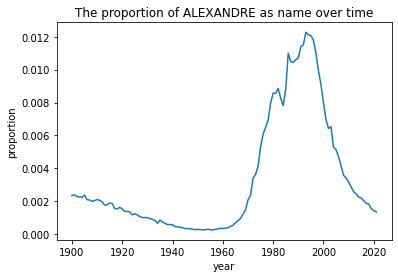

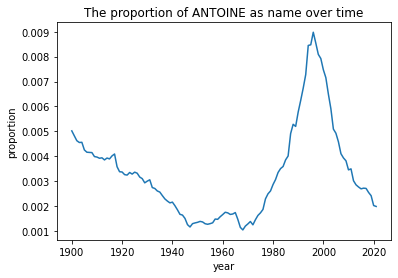

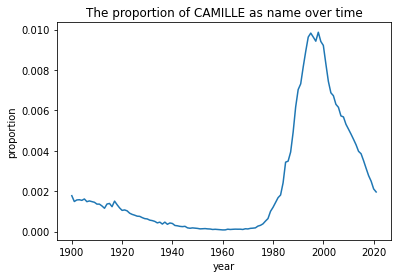

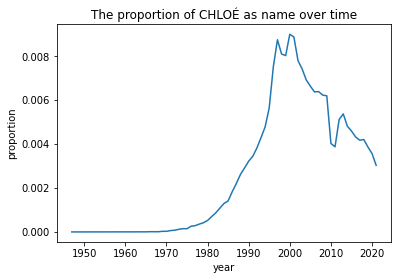

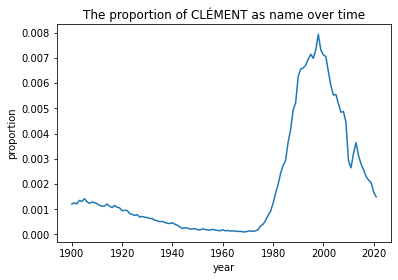

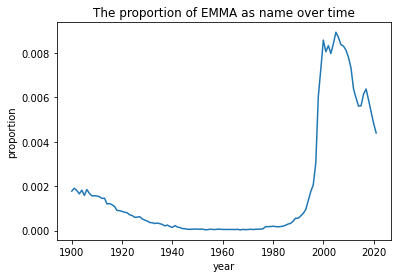

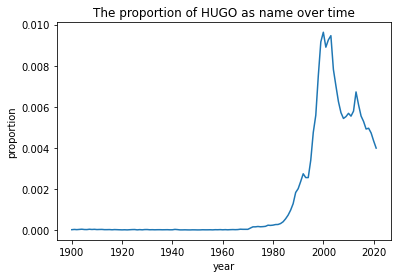

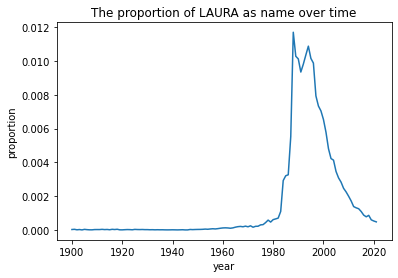

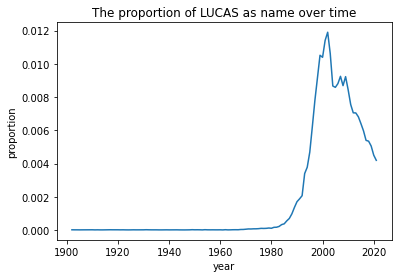

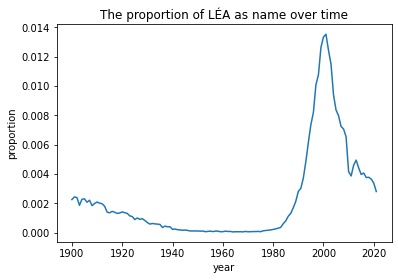

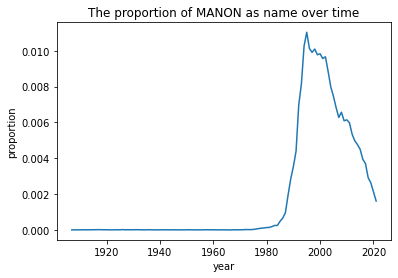

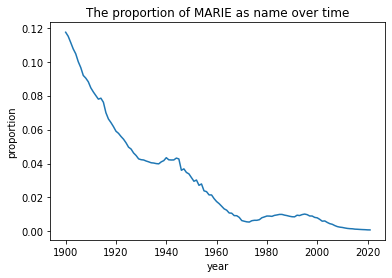

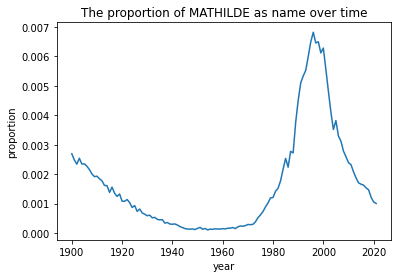

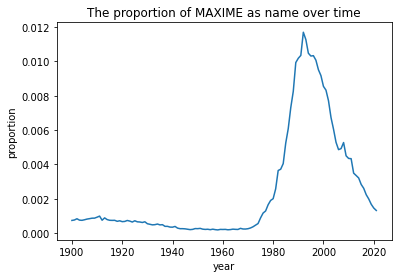

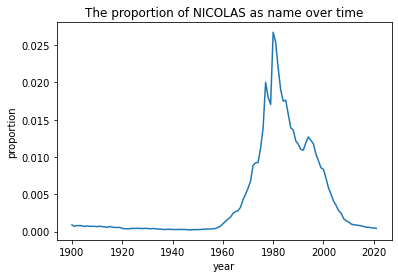

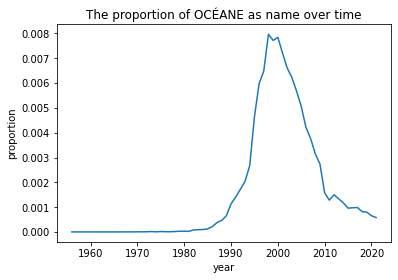

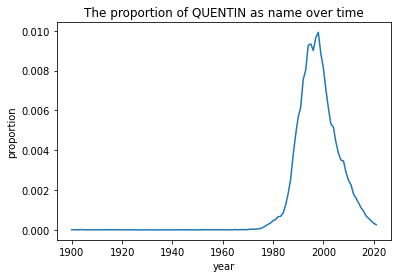

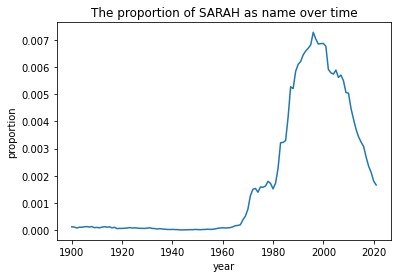

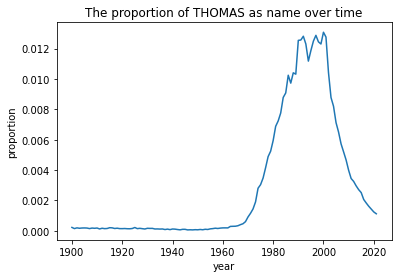

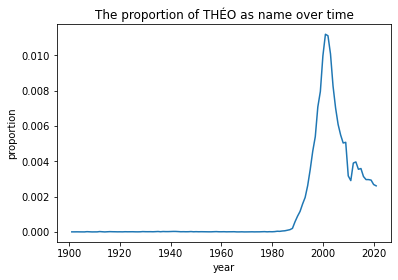

In [56]:
groups = top_10_firstnames_year_2000_over_time.groupby('firstname')

# a dict for each firstname
dfs = {name: group[['year', 'proportion']] for name, group in groups}

# plot each dataframe
for name, df in dfs.items():
    plt.figure()
    plt.plot(df['year'], df['proportion'])
    plt.title(f"The proportion of {name} as name over time")
    plt.xlabel('year')
    plt.ylabel('proportion')
    plt.show()


# Picturing concentration of babynames distributions


Every year, the name counts define a discrete probability distribution over the set of names (the universe).

This distribution, just as an income or wealth distribution, is (usually) far from being uniform. We want to assess how uneven it is.

We use the tools developed in econometrics.


Without loss of generality, we assume that we handle a distribution over positive integers $1, \ldots, n$ where $n$ is the number of distinct names given during a year.

We assume that frequencies $p_1, p_2, \ldots, p_n$ are given in ascending order, ties are broken arbitrarily.

The `Lorenz function` ([Lorenz](https://en.wikipedia.org/wiki/Lorenz_curve) not `Lorentz`) maps $[0, 1] \to [0, 1]$.

$$L(x) = \sum_{i=1}^{\lfloor nx \rfloor} p_i .$$

Note that this is a piecewise constant function. 


**Question:** Compute and plot the Lorenz fucntion for a given `sex`, `year` and `country`

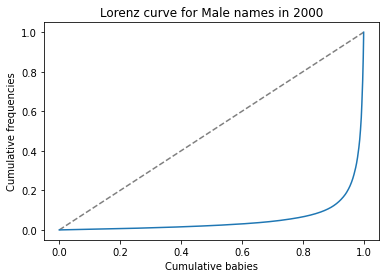

In [59]:
def lorenz(gender,year,country):
    
    df = data_dict[country][(data_dict[country]["gender"] == gender) & (data_dict[country]["year"] == year)]

    df = df.sort_values(by="count", ascending=True)
    
    total_count = df['count'].sum()
    
    frequencies = df["count"].values / total_count
    
    cumulative_frequencies = np.cumsum(frequencies)
    
    cumulative_babies = np.linspace(0, 1, df.shape[0])

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.plot(cumulative_babies, cumulative_frequencies)
    plt.xlabel("Cumulative babies")
    plt.ylabel("Cumulative frequencies")
    plt.title(f"Lorenz curve for {gender} names in {year}")
    plt.show()
    

lorenz('Male',2000,0)

In [60]:
%pip install canvas


[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Question:** Design an animated plot that shows the evolution of the Lorenz curve of babynames distribution through the years for a given sex and country.


In [61]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget
%matplotlib inline




@widgets.interact(year=(1900,2020,1), gender=['Male', 'Female'])
def update(year=2000, gender="Male",country=0):
      lorenz(gender,year,country)
    

interactive(children=(IntSlider(value=2000, description='year', max=2020, min=1900), Dropdown(description='gen…

The Lorenz curve summarizes how far a discrete probability distribution is from the uniform distribution. This is a very rich summary and it is difficult to communicate this message to a wide audience. People tend to favor numerical indices (they don't really understand, but they get used to it): Gini, Atkinson, Theil, ...

The [Gini index](https://en.wikipedia.org/wiki/Gini_coefficient) is twice the surface of the area comprised between curves $y=x$ and $y=L(x)$.

$$G = 2 \times \int_0^1 (x -L(x)) \mathrm{d}x$$

The next formula  allows us to compute it efficiently.

$$G={\frac {2\sum _{i=1}^{n}i p_{i}}{n\sum _{i=1}^{n}p_{i}}}-{\frac {n+1}{n}}.$$


**Question:** Compute and plot Gini index of names distribution over time for sex and countries 


In [60]:
'''
def gini_data(data,sex):
        data.dropna(subset=['year', 'count', 'gender', 'firstname'])
        data_gini = (data[(data['firstname'] != '_PRENOMS_RARES') & (data['gender']== sex)]
                 .join(total_female_births_by_year[0], on='year')
                 .assign(proportion=lambda x: x['count'] / x['total_female_births'])
                 .groupby('year')
                 .apply(lambda x: x.assign(i=x['proportion'].rank()))
                 .reset_index(drop=True)
                 .groupby('year')
                 .apply(lambda x: x.assign(gini=(2 * sum(x['i'] * x['proportion']) / (x.shape[0] * sum(x['proportion']))) - ((x.shape[0] + 1) / x.shape[0])))
                 .reset_index(drop=True)
                 .drop(['i', 'total_female_births'], axis=1)
                )
        return data_gini
'''

"\ndef gini_data(data,sex):\n        data.dropna(subset=['year', 'count', 'gender', 'firstname'])\n        data_gini = (data[(data['firstname'] != '_PRENOMS_RARES') & (data['gender']== sex)]\n                 .join(total_female_births_by_year[0], on='year')\n                 .assign(proportion=lambda x: x['count'] / x['total_female_births'])\n                 .groupby('year')\n                 .apply(lambda x: x.assign(i=x['proportion'].rank()))\n                 .reset_index(drop=True)\n                 .groupby('year')\n                 .apply(lambda x: x.assign(gini=(2 * sum(x['i'] * x['proportion']) / (x.shape[0] * sum(x['proportion']))) - ((x.shape[0] + 1) / x.shape[0])))\n                 .reset_index(drop=True)\n                 .drop(['i', 'total_female_births'], axis=1)\n                )\n        return data_gini\n"

# Picturing surges of popularity

In the sequel, the *popularity* of a gendered name in a population during a given year is the proportion of babies of that gender born during that year in that country,  that are given this name. 

**Question:** Prepare a data frame that contains for each hype name the 20 years before and 30 years after the maximum popularity is achieved, and, for each such year, the rank and popularity of the hype name. Do this for US and French data. 


In [61]:
df = dataFrance_sorted.rename(columns={"count":"count1"})
df=df.join(total_births_by_year[0],on='year').rename(columns={'count1':'count','count':'total_births'})
df['popularity'] = df['count']/df['total_births']

max_count_idx = df.groupby(['year', 'gender'])['count'].idxmax()
df_max_count= df.loc[max_count_idx]
#for male
df_top1_male_name_by_year = (df_max_count[df_max_count['gender']=='Male'])
year_hypiest_male_name = df_top1_male_name_by_year.groupby('firstname')['popularity'].idxmax()
df_hypiest_male_names_over_time = df_top1_male_name_by_year.loc[year_hypiest_male_name]
df_hypiest_male_names_over_time_list= list(map(tuple,df_hypiest_male_names_over_time .values))

#for female
df_top1_female_name_by_year = (df_max_count[df_max_count['gender']=='Female'])
year_hypiest_female_name = df_top1_female_name_by_year.groupby('firstname')['popularity'].idxmax()
df_hypiest_female_names_over_time = df_top1_female_name_by_year.loc[year_hypiest_female_name]
df_hypiest_female_names_over_time_list= list(map(tuple,df_hypiest_female_names_over_time .values))

data_result= pd.DataFrame(columns=['firstname','year','gender','rank','popularity'])

for x in df_hypiest_male_names_over_time_list:
    if ((int(x[1])-20)>=1900):
        startyear= int(x[1])-20
    else: 
        startyear=1900
    if ((int(x[1])+30)>=2021):
        endyear= int(x[1])+30
    else: 
        endyear=2021  
    
    name_df = df[(df['firstname']==x[0])&(df['year']>=startyear)&(df['year']<=endyear)&(df['gender']==x[2])]
    data_result= pd.concat([data_result,name_df])

for x in df_hypiest_female_names_over_time_list:
    if ((int(x[1])-20)>=1900):
        startyear= int(x[1])-20
    else: 
        startyear=1900
    if ((int(x[1])+30)>=2021):
        endyear= int(x[1])+30
    else: 
        endyear=2021  
    
    name_df = df[(df['firstname']==x[0])&(df['year']>=startyear)&(df['year']<=endyear)&(df['gender']=='Female')]
              
    data_result= pd.concat([data_result,name_df])

data_result

,firstname,year,gender,rank,popularity,count,total_births
148773,AURÉLIE,1963.0,Female,295.0,0.000030,27.0,899655.0
152557,AURÉLIE,1964.0,Female,281.0,0.000044,40.0,908776.0
156429,AURÉLIE,1965.0,Female,274.0,0.000055,49.0,897078.0
160363,AURÉLIE,1966.0,Female,251.0,0.000085,76.0,894740.0
164374,AURÉLIE,1967.0,Female,221.0,0.000133,116.0,870282.0
...,...,...,...,...,...,...,...
589862,SYLVIE,2017.0,Female,425.0,0.000009,7.0,755255.0
602502,SYLVIE,2018.0,Female,420.0,0.000017,13.0,744807.0
619025,SYLVIE,2019.0,Female,438.0,0.000007,5.0,739780.0
631649,SYLVIE,2020.0,Female,422.0,0.000010,7.0,721607.0


**Question:** Plot offseted popularity (share of given names within year, country, gender) curves of hype names. Facet by sex and country. 

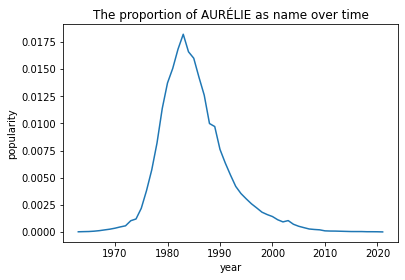

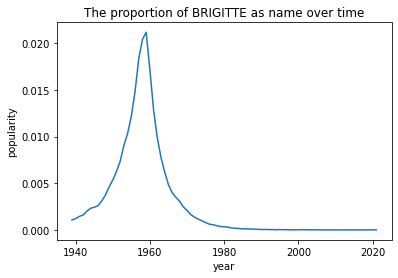

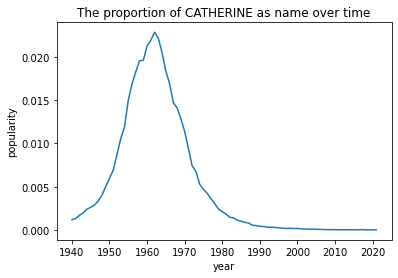

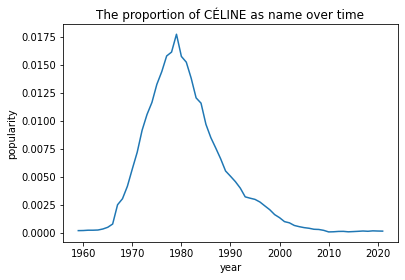

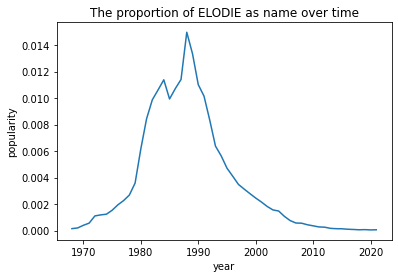

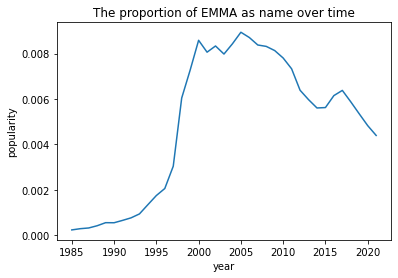

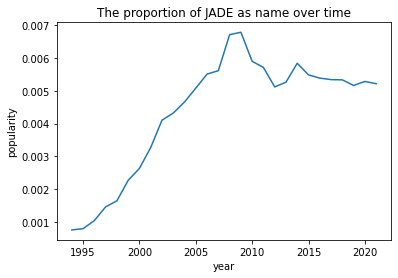

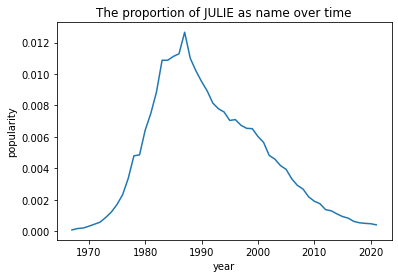

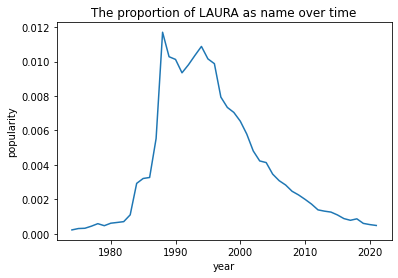

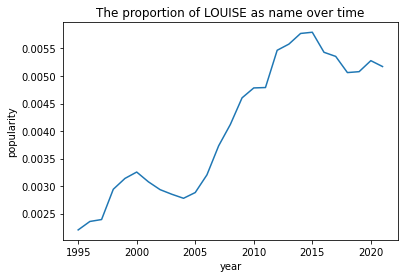

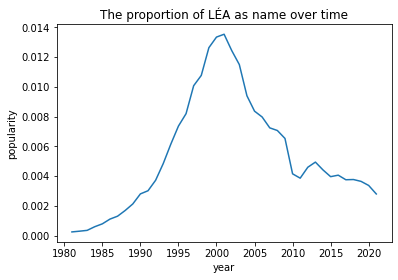

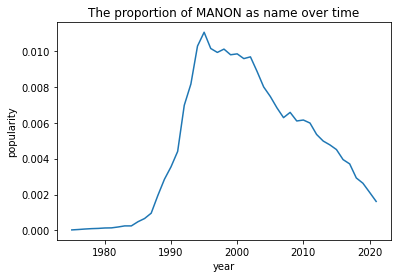

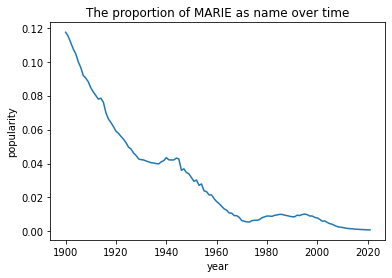

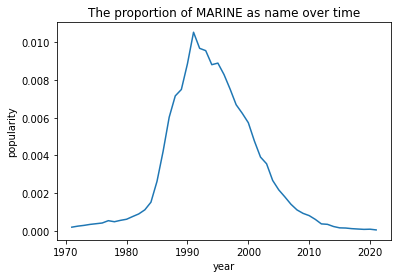

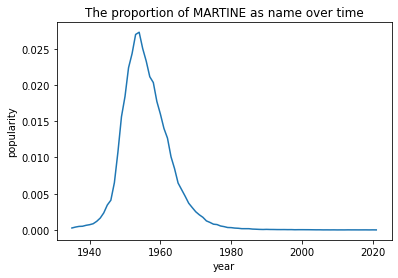

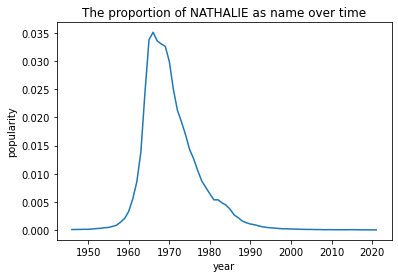

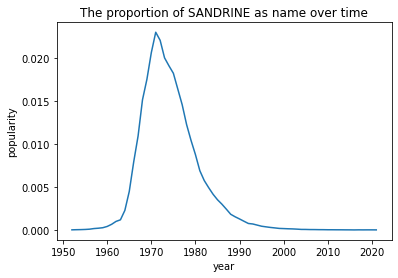

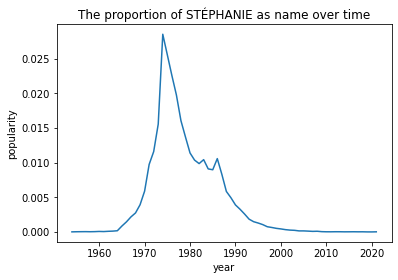

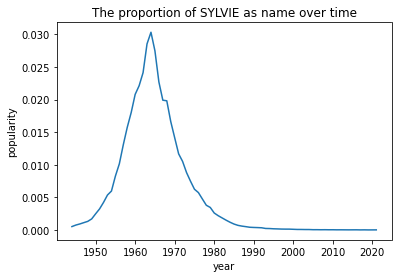

In [62]:
groups = data_result.groupby('firstname')

# a dict for each firstname
dfs = {name: group[['year', 'popularity']] for name, group in groups}

# plot each dataframe
for name, df in dfs.items():
    plt.figure()
    plt.plot(df['year'], df['popularity'])
    plt.title(f"The proportion of {name} as name over time")
    plt.xlabel('year')
    plt.ylabel('popularity')
    plt.show()

# Getting help

- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/)

- [plotly](https://plotly.com/python/) for animated plots

- [stackoverflow](https://stackoverflow.com)

- [stackoverflow: pandas](https://stackoverflow.com/questions/tagged/pandas)

- [stackoverflow: plotly+python](https://stackoverflow.com/questions/tagged/plotly+python)

- The US `babynames` analogue of the INSEE file has been a playground for data scientists,
 see [https://github.com/hadley/babynames](https://github.com/hadley/babynames)

- Don't Repeat Yourself (DRY) principle  at [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)